# **Missing data Mechanism**s
When we find missing data values in our data they are usually caused by 1 of 3 mechanisms outlined by Rubin (1976). It is very important that you understand them as they will have a major influence in how you treat your analysis. It will also determine if it is appropriate  to impute missing values. The following [link](https://stefvanbuuren.name/fimd/sec-MCAR.html) gives a nice explaination of the area. The 3 mechanisms are as follows:

# **Missing Completely at Random (MCAR)**
Missing Completely at Random is pretty straightforward.  What it means is what is says:  the propensity for a data point to be missing is completely random.

There’s no relationship between whether a data point is missing and any values in the data set, missing or observed.

The missing data are just a random subset of the data.

# **Missing at Random (MAR)**

This is where the unfortunate names come in.

Missing at Random means  the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.

Whether or not someone answered #13 on your survey has nothing to do with the missing values, but it does have to do with the values of some other variable.

A better name would actually be Missing Conditionally at Random, because the missingness is conditional on another variable.  But that’s not what Rubin originally picked, and it would really mess up the acronyms at this point.

The idea is, if we can control for this conditional variable, we can get a random subset.

There is another alternative to this case and exists where questions that have not been asked could determine if people answer the question in hand.

You can imagine that good techniques for data that is missing at random need to incorporate variables that are related to the missingness.

# **Missing Not at Random (MNAR)**

Data are missing not at random (MNAR) when the missing values on a variable are related to the values of that variable itself, even after controlling for other variables. For example, when data are missing on IQ and only the people with low IQ values have missing observations for this variable. A problem with the MNAR mechanism is that it is impossible to verify that scores are MNAR without knowing the missing values.


* Can you think of examples of each mechanism?
* If I have a variable that is not missing at random can I impute the the missing values?

Now I would like you to download the data from this [link](https://openmv.net/info/class-grades). Now analyses the data and record which variables have missing values. The code below should get you going. Can you tell what type of missing process is occuring for the Final exam mark.





In [3]:
#https://drive.google.com/file/d/1S7Dvikcr0O6Xj_bcJnUqyvU6qo8hkjSD/view?usp=sharing

import pandas as pd

df3 = pd.read_csv('class-grades.csv')
print(df3.describe())

          Prefix  Assignment    Tutorial     Midterm    TakeHome       Final
count  99.000000   99.000000   99.000000   99.000000   98.000000   96.000000
mean    7.313131   85.491717   89.731111   68.049495   80.828469   68.414375
std     0.932918   12.597694   15.071556   19.376074   23.808806   18.801087
min     4.000000   28.140000   34.090000   28.120000   16.910000   28.060000
25%     7.000000   80.875000   83.350000   52.810000   66.015000   53.122500
50%     8.000000   89.940000   93.100000   69.380000   87.960000   66.250000
75%     8.000000   95.000000  100.550000   82.810000   98.747500   84.167500
max     8.000000  100.830000  112.580000  110.000000  108.890000  108.890000


We can see that there are 3 values missing in the final column and 1 in the Takehome column. Conduct a basic boxplot of the Assignment, Tutorial and Midterm based on the missing/ non missing categories from the final mark.


In [4]:

df3.loc[df3['Final'].isnull()==True,'Missing']="Y"
df3.loc[df3['Final'].isnull()==False,'Missing']="N"
print(df3.loc[df3['Missing']=="Y",'Missing'])




20    Y
38    Y
60    Y
Name: Missing, dtype: object


<Axes: >

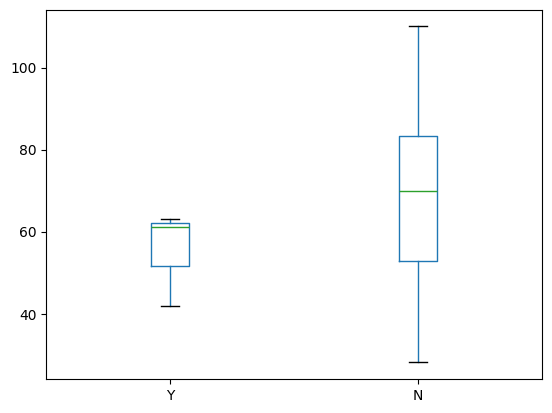

In [5]:
#dfassign=df3.pivot(columns = 'Missing',values=['Assignment'])['Assignment']
#print(dfassign['Y'])

#dfassign.boxplot(column=['Y','N'],grid=False)

dfassign=df3.pivot(columns = 'Missing',values=['Midterm'])['Midterm']
#print(dfassign['Y'])

dfassign.boxplot(column=['Y','N'],grid=False)
#d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)
#plt.show()

If you conduct analysis from the above code on each of the input variables you will see that there is no real evidence that the MAR is a reasonable missing value structure for the Final column. Also you will see there are some low marks so it is unlikly that the missing marks are due to the Final mark itself. So the final conclusion is that it is safe to say that the mark is MCAR.

</br>Would you impute the final mark? Discuss this amongst yourselves.